<a href="https://colab.research.google.com/github/Ivaneskins/neyral/blob/Apply-new-technology/Copy_of_Kurs_origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras_preprocessing.image import ImageDataGenerator 
from __future__ import print_function, division

from keras.datasets import mnist, cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, MaxPooling2D, concatenate, Embedding, multiply
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

import sys

import numpy as np

Using TensorFlow backend.


In [1]:
print('NEW test')

NEW test


In [0]:
from keras.applications.vgg19 import VGG19


In [0]:
# Подгрузка google-drive

from google.colab import drive
drive.mount('/content/drive1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive1


### Подготовка данных картинок из 3х категорий

In [0]:
# Rescale/нормализация картинок 3х категорий
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка 3х классов

train_generator = train_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Train',
        target_size=(112, 112),
        batch_size=32,
        class_mode='categorical')

# Проверочная выборка 3х классов

validation_generator = test_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Validation',
        target_size=(112, 112),
        batch_size=32,
        class_mode='categorical')


Found 1557 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [0]:
classes=['Ferdinand', 'KV-2', 'Priest', 'PZ-3', 'SU-85', 'T-34', 'T-90', 'Tigre']

### Функция PLOT

In [0]:
def plotAny():
  plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_acc'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

### Настройка предобученной модели VGG19

In [0]:
input_shape = (224, 224, 3)

vgg19_my = VGG19(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)

vgg19_my.trainable = False





80142336/80134624 [==============================] - 3s 0us/step








### Модели нейронной сети с VGG19

In [0]:
model = Sequential()
model.add(vgg19_my)
'''model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))'''
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam", 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)

Epoch 1/10
30/30 [==============================] - 12s 391ms/step - loss: 7.1140 - acc: 0.4564 - val_loss: 6.9415 - val_acc: 0.4667
Epoch 2/10
30/30 [==============================] - 11s 361ms/step - loss: 6.0382 - acc: 0.5961 - val_loss: 5.8676 - val_acc: 0.6000
Epoch 3/10
30/30 [==============================] - 11s 364ms/step - loss: 5.9642 - acc: 0.6282 - val_loss: 5.9267 - val_acc: 0.6000
Epoch 4/10
30/30 [==============================] - 11s 371ms/step - loss: 5.8312 - acc: 0.6383 - val_loss: 5.7546 - val_acc: 0.5333
Epoch 5/10
30/30 [==============================] - 11s 368ms/step - loss: 5.9306 - acc: 0.6321 - val_loss: 5.7918 - val_acc: 0.5333
Epoch 6/10
30/30 [==============================] - 11s 351ms/step - loss: 5.9018 - acc: 0.6338 - val_loss: 5.7903 - val_acc: 0.5333
Epoch 7/10
30/30 [==============================] - 11s 368ms/step - loss: 5.9448 - acc: 0.6312 - val_loss: 5.7719 - val_acc: 0.5333
Epoch 8/10
29/30 [============================>.] - ETA: 0s - loss: 5

KeyboardInterrupt: ignored

# СВоя сетка, денсе слой 32, 64

Epoch 1/30
 6/30 [=====>........................] - ETA: 1:24 - loss: 1.6238 - acc: 0.4988

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 82s 3s/step - loss: 1.3364 - acc: 0.5412 - val_loss: 0.8422 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 34s 1s/step - loss: 0.9305 - acc: 0.6208 - val_loss: 1.0679 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 35s 1s/step - loss: 0.8061 - acc: 0.6549 - val_loss: 0.8146 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 36s 1s/step - loss: 0.7018 - acc: 0.7036 - val_loss: 1.0308 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.6212 - acc: 0.7241 - val_loss: 1.0643 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 36s 1s/step - loss: 0.5858 - acc: 0.7429 - val_loss: 0.6861 - val_acc: 0.6000
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.5730 - acc: 0.7523 - val_loss: 1.2011 - val_acc: 0.5000
Epoch 8/30
30/30 [==============================] - 36s 1s/step - loss: 0.5519 - acc: 0.7789 - val_lo

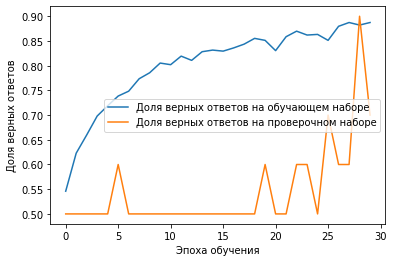

Точность при dense = 32 =  0.699999988079071
Epoch 1/30
 8/30 [=======>......................] - ETA: 26s - loss: 2.5724 - acc: 0.4618

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 39s 1s/step - loss: 1.6311 - acc: 0.5965 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 34s 1s/step - loss: 1.0184 - acc: 0.6568 - val_loss: 0.9564 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 35s 1s/step - loss: 0.7597 - acc: 0.6858 - val_loss: 0.9843 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 36s 1s/step - loss: 0.6328 - acc: 0.7167 - val_loss: 1.4587 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 35s 1s/step - loss: 0.6261 - acc: 0.7310 - val_loss: 1.7192 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 33s 1s/step - loss: 0.6192 - acc: 0.7502 - val_loss: 1.1543 - val_acc: 0.5000
Epoch 7/30
30/30 [==============================] - 35s 1s/step - loss: 0.5179 - acc: 0.7769 - val_loss: 1.5335 - val_acc: 0.5000
Epoch 8/30
30/30 [==============================] - 34s 1s/step - loss: 0.5063 - acc: 0.7772 - val_lo

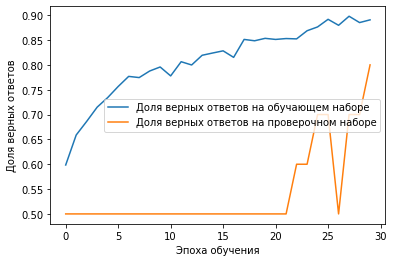

Точность при dense = 64 =  0.800000011920929


In [0]:
dropout = 0.5
denses = [32, 64]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Своя сеть Денсе 64, 128 при вайлиде = 10 картинок

Epoch 1/30
 6/30 [=====>........................] - ETA: 36s - loss: 1.3245 - acc: 0.5521

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 42s 1s/step - loss: 1.2364 - acc: 0.5767 - val_loss: 1.7592 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 38s 1s/step - loss: 1.0023 - acc: 0.6431 - val_loss: 0.7982 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.7554 - acc: 0.7014 - val_loss: 0.8588 - val_acc: 0.5500
Epoch 4/30
30/30 [==============================] - 37s 1s/step - loss: 0.7950 - acc: 0.7156 - val_loss: 0.6714 - val_acc: 0.7000
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.6710 - acc: 0.7421 - val_loss: 0.6619 - val_acc: 0.6500
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.5352 - acc: 0.7608 - val_loss: 0.7061 - val_acc: 0.6500
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.5203 - acc: 0.7808 - val_loss: 0.7762 - val_acc: 0.6500
Epoch 8/30
30/30 [==============================] - 37s 1s/step - loss: 0.5088 - acc: 0.7826 - val_lo

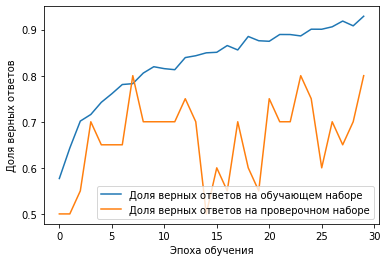

Точность при dense = 64 =  0.800000011920929
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 43s 1s/step - loss: 1.2229 - acc: 0.6032 - val_loss: 0.7889 - val_acc: 0.7000
Epoch 2/30
30/30 [==============================] - 37s 1s/step - loss: 0.9132 - acc: 0.7064 - val_loss: 0.9012 - val_acc: 0.5500
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.6395 - acc: 0.7401 - val_loss: 0.7961 - val_acc: 0.6500
Epoch 4/30
30/30 [==============================] - 37s 1s/step - loss: 0.6142 - acc: 0.7553 - val_loss: 0.9697 - val_acc: 0.5500
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.5846 - acc: 0.7652 - val_loss: 0.9536 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.5021 - acc: 0.7764 - val_loss: 0.9204 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.4848 - acc: 0.8017 - val_loss: 1.1380 - val_acc: 0.7000
Epoch 8/30
30/30 [==============================] - 37s 1s/step - loss: 0.4876 - acc: 0.7974 - val_lo

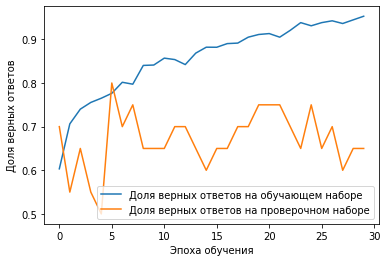

Точность при dense = 128 =  0.6499999761581421


In [0]:
dropout = 0.5
denses = [64, 128]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# При Денсе 32, 64, валид 10 картинок

Epoch 1/30
11/30 [==========>...................] - ETA: 25s - loss: 1.2177 - acc: 0.5467

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 44s 1s/step - loss: 1.2072 - acc: 0.5741 - val_loss: 0.7851 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 37s 1s/step - loss: 0.8918 - acc: 0.6667 - val_loss: 0.8032 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.6847 - acc: 0.6931 - val_loss: 1.0314 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 38s 1s/step - loss: 0.6055 - acc: 0.7419 - val_loss: 0.9850 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.5519 - acc: 0.7620 - val_loss: 0.9645 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.5690 - acc: 0.7973 - val_loss: 0.9037 - val_acc: 0.5000
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.4937 - acc: 0.7733 - val_loss: 0.6650 - val_acc: 0.6000
Epoch 8/30
30/30 [==============================] - 38s 1s/step - loss: 0.4274 - acc: 0.8036 - val_lo

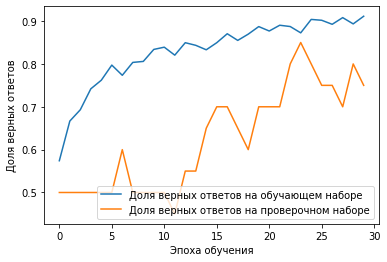

Точность при dense = 32 =  0.75
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 43s 1s/step - loss: 1.2361 - acc: 0.5719 - val_loss: 0.5978 - val_acc: 0.7000
Epoch 2/30
30/30 [==============================] - 37s 1s/step - loss: 1.0327 - acc: 0.6238 - val_loss: 0.6338 - val_acc: 0.6000
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.7346 - acc: 0.7140 - val_loss: 0.9375 - val_acc: 0.6000
Epoch 4/30
30/30 [==============================] - 37s 1s/step - loss: 0.7367 - acc: 0.7283 - val_loss: 0.9840 - val_acc: 0.7000
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.6590 - acc: 0.7283 - val_loss: 0.8787 - val_acc: 0.6000
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.5849 - acc: 0.7640 - val_loss: 0.7332 - val_acc: 0.6000
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.5618 - acc: 0.7564 - val_loss: 0.8958 - val_acc: 0.8000
Epoch 8/30
30/30 [==============================] - 37s 1s/step - loss: 0.4855 - acc: 0.7838 - val_lo

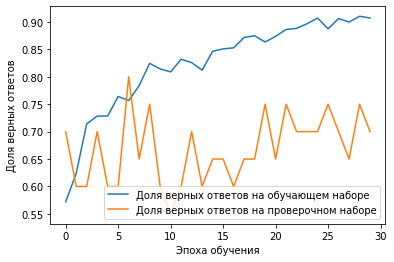

Точность при dense = 64 =  0.699999988079071


In [0]:
dropout = 0.5
denses = [32, 64]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

## При денсе 16. 32. 64 валид картинок = 10 дропаут 0.4

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


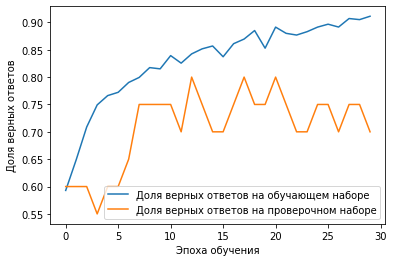

Точность при dense = 16 =  0.699999988079071


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


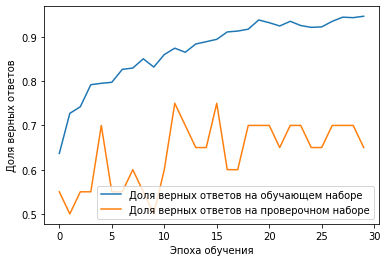

Точность при dense = 32 =  0.6499999761581421


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


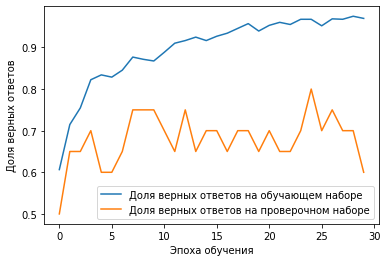

Точность при dense = 64 =  0.6000000238418579


In [0]:
dropout = 0.4
denses = [16, 32, 64]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=0)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Свои слои Денс 64, 128

Epoch 1/30
30/30 [==============================] - 37s 1s/step - loss: 1.0534 - acc: 0.5987 - val_loss: 0.6368 - val_acc: 0.8000
Epoch 2/30
30/30 [==============================] - 33s 1s/step - loss: 0.7128 - acc: 0.6975 - val_loss: 0.6275 - val_acc: 0.8000
Epoch 3/30
30/30 [==============================] - 33s 1s/step - loss: 0.5024 - acc: 0.7651 - val_loss: 0.5435 - val_acc: 0.8000
Epoch 4/30
30/30 [==============================] - 35s 1s/step - loss: 0.4649 - acc: 0.7885 - val_loss: 0.5394 - val_acc: 0.8000
Epoch 5/30
30/30 [==============================] - 34s 1s/step - loss: 0.3892 - acc: 0.8231 - val_loss: 0.5976 - val_acc: 0.8000
Epoch 6/30
30/30 [==============================] - 33s 1s/step - loss: 0.3814 - acc: 0.8440 - val_loss: 0.6799 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 34s 1s/step - loss: 0.3832 - acc: 0.8464 - val_loss: 0.6700 - val_acc: 0.8000
Epoch 8/30
30/30 [==============================] - 34s 1s/step - loss: 0.3110 - acc: 0.85

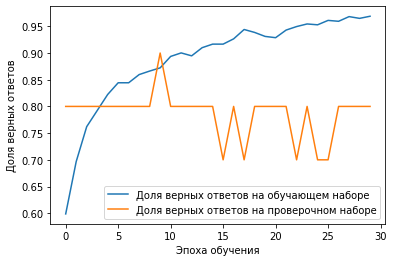

Точность при dense = 64 =  0.800000011920929
Epoch 1/30
30/30 [==============================] - 37s 1s/step - loss: 1.2506 - acc: 0.5523 - val_loss: 0.6649 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 34s 1s/step - loss: 0.8797 - acc: 0.6763 - val_loss: 1.9111 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 32s 1s/step - loss: 0.6794 - acc: 0.7449 - val_loss: 0.9381 - val_acc: 0.7000
Epoch 4/30
30/30 [==============================] - 35s 1s/step - loss: 0.6071 - acc: 0.7558 - val_loss: 0.7981 - val_acc: 0.8000
Epoch 5/30
30/30 [==============================] - 35s 1s/step - loss: 0.5425 - acc: 0.8037 - val_loss: 0.9469 - val_acc: 0.8000
Epoch 6/30
30/30 [==============================] - 32s 1s/step - loss: 0.4606 - acc: 0.8106 - val_loss: 1.1629 - val_acc: 0.6000
Epoch 7/30
30/30 [==============================] - 34s 1s/step - loss: 0.4462 - acc: 0.8154 - val_loss: 1.0137 - val_acc: 0.7000
Epoch 8/30
30/30 [===========================

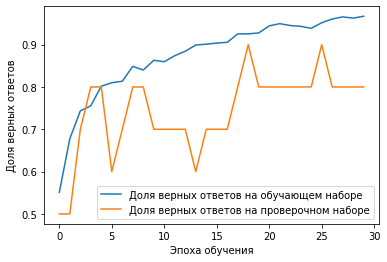

Точность при dense = 128 =  0.800000011920929
Epoch 1/30
30/30 [==============================] - 37s 1s/step - loss: 1.9134 - acc: 0.5616 - val_loss: 0.8072 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 33s 1s/step - loss: 0.9248 - acc: 0.6807 - val_loss: 0.8402 - val_acc: 0.9000
Epoch 3/30
30/30 [==============================] - 33s 1s/step - loss: 0.5873 - acc: 0.7754 - val_loss: 0.9419 - val_acc: 0.7000
Epoch 4/30
30/30 [==============================] - 34s 1s/step - loss: 0.5308 - acc: 0.7876 - val_loss: 0.9359 - val_acc: 0.8000
Epoch 5/30
30/30 [==============================] - 33s 1s/step - loss: 0.4705 - acc: 0.8119 - val_loss: 1.3233 - val_acc: 0.8000
Epoch 6/30
30/30 [==============================] - 33s 1s/step - loss: 0.3760 - acc: 0.8408 - val_loss: 1.8816 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 33s 1s/step - loss: 0.3713 - acc: 0.8562 - val_loss: 1.8476 - val_acc: 0.8000
Epoch 8/30
30/30 [==========================

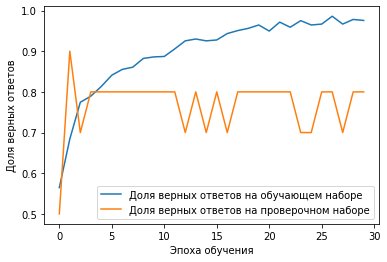

Точность при dense = 256 =  0.800000011920929


In [0]:
dropout = 0.5
denses = [64, 128, 256]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Свои слои ДЕнсе 256












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
30/30 [==============================] - 107s 4s/step - loss: 1.2974 - acc: 0.6282 - val_loss: 5.2233 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 35s 1s/step - loss: 0.9550 - acc: 0.7099 - val_loss: 2.3259 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 32s 1s/step - loss: 0.7737 - acc: 0.7615 - val_loss: 1.5813 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 36s 1s/step - loss: 0.6591 - acc: 0.8040 - val_loss: 1.6404 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 33s 1s/step - loss: 0.6675 - acc: 0.7796 - val_loss: 1.3434 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 34s 1s/step - loss: 0.5529 - acc: 0.8050 - val_loss: 1.4044 - val_acc: 0.

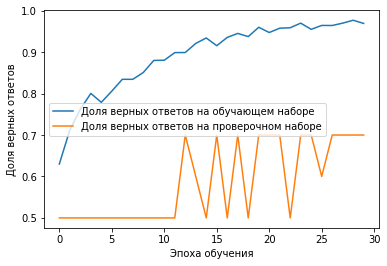

Точность при dense = 256 =  0.699999988079071


In [0]:
dropout = 0.5
denses = [256]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Свои слои Dense 16. 32

Epoch 1/30
30/30 [==============================] - 38s 1s/step - loss: 1.0959 - acc: 0.5690 - val_loss: 0.6666 - val_acc: 0.6000
Epoch 2/30
30/30 [==============================] - 34s 1s/step - loss: 0.7253 - acc: 0.6826 - val_loss: 0.7067 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 33s 1s/step - loss: 0.5919 - acc: 0.7313 - val_loss: 0.7488 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 35s 1s/step - loss: 0.5106 - acc: 0.7602 - val_loss: 0.7990 - val_acc: 0.6000
Epoch 5/30
30/30 [==============================] - 33s 1s/step - loss: 0.4390 - acc: 0.7829 - val_loss: 0.8569 - val_acc: 0.6000
Epoch 6/30
30/30 [==============================] - 34s 1s/step - loss: 0.4702 - acc: 0.7832 - val_loss: 0.7137 - val_acc: 0.7000
Epoch 7/30
30/30 [==============================] - 34s 1s/step - loss: 0.4049 - acc: 0.8054 - val_loss: 0.9114 - val_acc: 0.5000
Epoch 8/30
30/30 [==============================] - 34s 1s/step - loss: 0.3955 - acc: 0.81

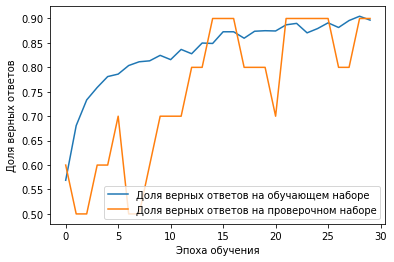

Точность при dense = 16 =  0.8999999761581421
Epoch 1/30
30/30 [==============================] - 37s 1s/step - loss: 1.5842 - acc: 0.5424 - val_loss: 0.6609 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 34s 1s/step - loss: 0.8201 - acc: 0.6391 - val_loss: 0.6790 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 33s 1s/step - loss: 0.6500 - acc: 0.7172 - val_loss: 0.7612 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 35s 1s/step - loss: 0.5893 - acc: 0.7692 - val_loss: 0.8421 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 33s 1s/step - loss: 0.5141 - acc: 0.7799 - val_loss: 1.2187 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 33s 1s/step - loss: 0.4772 - acc: 0.7789 - val_loss: 1.2813 - val_acc: 0.5000
Epoch 7/30
30/30 [==============================] - 35s 1s/step - loss: 0.4223 - acc: 0.8227 - val_loss: 1.0738 - val_acc: 0.5000
Epoch 8/30
30/30 [==========================

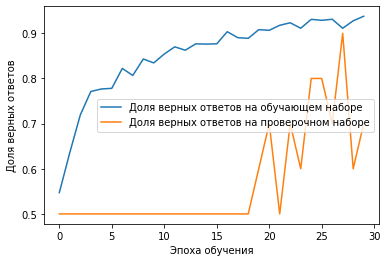

Точность при dense = 32 =  0.699999988079071


In [0]:
dropout = 0.5
denses = [16, 32]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Свои слои Dense 16. 32












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
30/30 [==============================] - 104s 3s/step - loss: 1.0643 - acc: 0.5427 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 36s 1s/step - loss: 0.7608 - acc: 0.5916 - val_loss: 0.6923 - val_acc: 0.6000
Epoch 3/30
30/30 [==============================] - 36s 1s/step - loss: 0.6659 - acc: 0.6255 - val_loss: 0.6901 - val_acc: 0.6000
Epoch 4/30
30/30 [==============================] - 40s 1s/step - loss: 0.6314 - acc: 0.6787 - val_loss: 0.6649 - val_acc: 0.6000
Epoch 5/30
30/30 [==============================] - 39s 1s/step - loss: 0.5842 - acc: 0.6985 - val_loss: 0.6728 - val_acc: 0.6000
Epoch 6/30
30/30 [==============================] - 38s 1s/step - loss: 0.5672 - acc: 0.7317 - val_loss: 0.6663 - val_acc: 0.

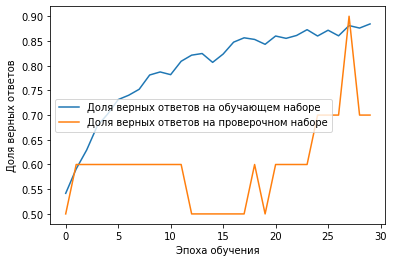

Точность при dense = 8 =  0.699999988079071
Epoch 1/30
30/30 [==============================] - 41s 1s/step - loss: 1.1252 - acc: 0.5681 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 38s 1s/step - loss: 0.7529 - acc: 0.6288 - val_loss: 0.7189 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 36s 1s/step - loss: 0.6193 - acc: 0.6784 - val_loss: 0.7099 - val_acc: 0.4000
Epoch 4/30
30/30 [==============================] - 37s 1s/step - loss: 0.5346 - acc: 0.7333 - val_loss: 0.8545 - val_acc: 0.4000
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.4821 - acc: 0.7400 - val_loss: 0.8664 - val_acc: 0.4000
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.4468 - acc: 0.7686 - val_loss: 1.1303 - val_acc: 0.4000
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.4636 - acc: 0.7666 - val_loss: 2.1932 - val_acc: 0.4000
Epoch 8/30
30/30 [============================

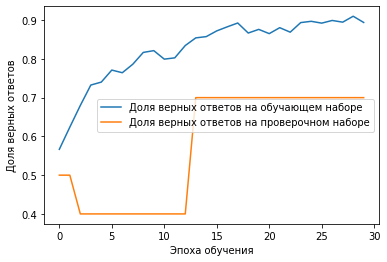

Точность при dense = 16 =  0.699999988079071
Epoch 1/30
30/30 [==============================] - 41s 1s/step - loss: 1.1088 - acc: 0.5828 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 38s 1s/step - loss: 0.7922 - acc: 0.6631 - val_loss: 0.6887 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.6566 - acc: 0.7069 - val_loss: 0.7809 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 39s 1s/step - loss: 0.5333 - acc: 0.7530 - val_loss: 0.8018 - val_acc: 0.6000
Epoch 5/30
30/30 [==============================] - 36s 1s/step - loss: 0.4686 - acc: 0.7910 - val_loss: 1.1591 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 36s 1s/step - loss: 0.4198 - acc: 0.8058 - val_loss: 1.6504 - val_acc: 0.5000
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.4045 - acc: 0.8179 - val_loss: 1.8952 - val_acc: 0.5000
Epoch 8/30
30/30 [===========================

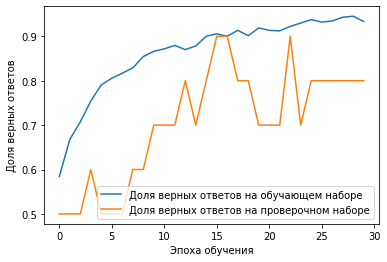

Точность при dense = 32 =  0.800000011920929


In [0]:
dropout = 0.5
denses = [8, 16, 32]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Проверить Dense 32 и 64 и выбрать победителя

Epoch 1/30
30/30 [==============================] - 43s 1s/step - loss: 1.4167 - acc: 0.5562 - val_loss: 0.6916 - val_acc: 0.4000
Epoch 2/30
30/30 [==============================] - 38s 1s/step - loss: 0.8053 - acc: 0.6402 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.7043 - acc: 0.6796 - val_loss: 0.6153 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 40s 1s/step - loss: 0.5660 - acc: 0.7237 - val_loss: 0.6201 - val_acc: 0.7000
Epoch 5/30
30/30 [==============================] - 38s 1s/step - loss: 0.4740 - acc: 0.7649 - val_loss: 0.6251 - val_acc: 0.7000
Epoch 6/30
30/30 [==============================] - 38s 1s/step - loss: 0.4556 - acc: 0.7864 - val_loss: 0.6288 - val_acc: 0.6000
Epoch 7/30
30/30 [==============================] - 38s 1s/step - loss: 0.4237 - acc: 0.7988 - val_loss: 0.5294 - val_acc: 0.9000
Epoch 8/30
30/30 [==============================] - 37s 1s/step - loss: 0.4490 - acc: 0.82

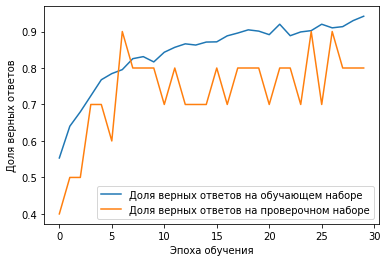

Точность при dense = 32 =  0.800000011920929
Epoch 1/30
30/30 [==============================] - 41s 1s/step - loss: 1.0277 - acc: 0.5707 - val_loss: 0.6648 - val_acc: 0.7000
Epoch 2/30
30/30 [==============================] - 37s 1s/step - loss: 0.7112 - acc: 0.6904 - val_loss: 0.6443 - val_acc: 0.8000
Epoch 3/30
30/30 [==============================] - 36s 1s/step - loss: 0.5398 - acc: 0.7527 - val_loss: 0.9428 - val_acc: 0.8000
Epoch 4/30
30/30 [==============================] - 40s 1s/step - loss: 0.4928 - acc: 0.8004 - val_loss: 0.6383 - val_acc: 0.8000
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.4319 - acc: 0.8056 - val_loss: 1.0936 - val_acc: 0.7000
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.4229 - acc: 0.8254 - val_loss: 0.9885 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 38s 1s/step - loss: 0.3463 - acc: 0.8360 - val_loss: 1.5944 - val_acc: 0.8000
Epoch 8/30
30/30 [===========================

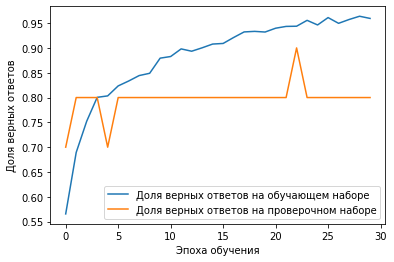

Точность при dense = 64 =  0.800000011920929


In [0]:
dropout = 0.5
denses = [32, 64]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(224, 224, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# VGG19 Денсе 64


In [0]:
# Настройка слоя VGG19

input_shape = (224, 224, 3)
vgg19_my = VGG19(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
vgg19_my.trainable = False


80142336/80134624 [==============================] - 1s 0us/step


Epoch 1/10
30/30 [==============================] - 42s 1s/step - loss: 0.5317 - acc: 0.7317 - val_loss: 0.4472 - val_acc: 0.8000
Epoch 2/10
30/30 [==============================] - 32s 1s/step - loss: 0.2793 - acc: 0.8832 - val_loss: 0.4388 - val_acc: 0.7000
Epoch 3/10
30/30 [==============================] - 32s 1s/step - loss: 0.1844 - acc: 0.9477 - val_loss: 0.4197 - val_acc: 0.7000
Epoch 4/10
30/30 [==============================] - 34s 1s/step - loss: 0.1215 - acc: 0.9733 - val_loss: 0.3939 - val_acc: 0.8000
Epoch 5/10
30/30 [==============================] - 33s 1s/step - loss: 0.1121 - acc: 0.9733 - val_loss: 0.3705 - val_acc: 0.8000
Epoch 6/10
30/30 [==============================] - 36s 1s/step - loss: 0.0721 - acc: 0.9917 - val_loss: 0.3754 - val_acc: 0.8000
Epoch 7/10
30/30 [==============================] - 35s 1s/step - loss: 0.0572 - acc: 0.9958 - val_loss: 0.3698 - val_acc: 0.8000
Epoch 8/10
30/30 [==============================] - 36s 1s/step - loss: 0.0523 - acc: 0.99

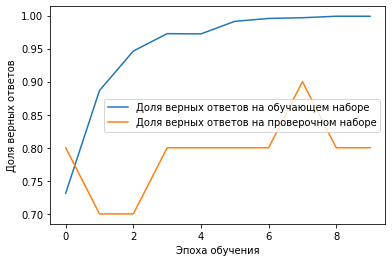

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

# VGG19 dense 32

Epoch 1/10
30/30 [==============================] - 38s 1s/step - loss: 0.5761 - acc: 0.7063 - val_loss: 0.7097 - val_acc: 0.6000
Epoch 2/10
30/30 [==============================] - 35s 1s/step - loss: 0.3925 - acc: 0.8382 - val_loss: 0.4631 - val_acc: 0.8000
Epoch 3/10
30/30 [==============================] - 35s 1s/step - loss: 0.2647 - acc: 0.9190 - val_loss: 0.3752 - val_acc: 0.9000
Epoch 4/10
30/30 [==============================] - 38s 1s/step - loss: 0.2340 - acc: 0.9377 - val_loss: 0.3593 - val_acc: 0.9000
Epoch 5/10
30/30 [==============================] - 34s 1s/step - loss: 0.1733 - acc: 0.9615 - val_loss: 0.3486 - val_acc: 0.8000
Epoch 6/10
30/30 [==============================] - 34s 1s/step - loss: 0.1372 - acc: 0.9812 - val_loss: 0.3577 - val_acc: 0.8000
Epoch 7/10
30/30 [==============================] - 35s 1s/step - loss: 0.1221 - acc: 0.9833 - val_loss: 0.3517 - val_acc: 0.8000
Epoch 8/10
30/30 [==============================] - 36s 1s/step - loss: 0.1001 - acc: 0.98

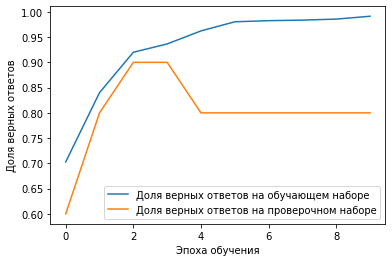

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

# PREDICT

In [0]:
files.upload()

Saving 34test.jpg to 34test (1).jpg


{'34test.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00hExif\x00\x00II*\x00\x08\x00\x00\x00\x03\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x001\x01\x02\x00\x10\x00\x00\x002\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00B\x00\x00\x00\x00\x00\x00\x00Shotwell 0.28.4\x00\x02\x00\x02\xa0\t\x00\x01\x00\x00\x00\xf6\x02\x00\x00\x03\xa0\t\x00\x01\x00\x00\x00\xf3\x02\x00\x00\x00\x00\x00\x00\xff\xe1\t\xf4http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 4.4.0-Exiv2"> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:exif="http://ns.adobe.com/exif/1.0/" xmlns:tiff="http://ns.adobe.com/tiff/1.0/" exif:PixelXDimension="758" exif:PixelYDimension="755" tiff:ImageWidth="758" tiff:ImageHeight="755" tiff:Orientation="1"/> </rdf:RDF> </x:xmpmeta>                                                                        

In [0]:
!ls


'34test (1).jpg'   34test.jpg   drive1	 sample_data


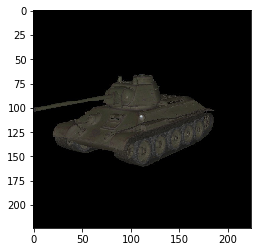

In [0]:
img_path = '34test (1).jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [0]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])

Распознанный образ:  1
Название распознанного образа:  T-34


# Новые 3 класса тест

Epoch 1/30
21/30 [====================>.........] - ETA: 57s - loss: 2.8358 - acc: 0.1116 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 227s 8s/step - loss: 2.7260 - acc: 0.1194 - val_loss: 2.0734 - val_acc: 0.1213
Epoch 2/30
30/30 [==============================] - 164s 5s/step - loss: 2.2915 - acc: 0.1302 - val_loss: 2.0783 - val_acc: 0.1360
Epoch 3/30
30/30 [==============================] - 27s 886ms/step - loss: 2.2402 - acc: 0.1464 - val_loss: 2.0712 - val_acc: 0.1523
Epoch 4/30
30/30 [==============================] - 26s 877ms/step - loss: 2.1394 - acc: 0.1490 - val_loss: 2.0707 - val_acc: 0.1875
Epoch 5/30
30/30 [==============================] - 27s 891ms/step - loss: 2.1033 - acc: 0.1531 - val_loss: 2.0708 - val_acc: 0.1213
Epoch 6/30
30/30 [==============================] - 28s 931ms/step - loss: 2.1356 - acc: 0.1422 - val_loss: 2.0687 - val_acc: 0.1523
Epoch 7/30
30/30 [==============================] - 27s 892ms/step - loss: 2.0859 - acc: 0.1615 - val_loss: 2.0654 - val_acc: 0.1654
Epoch 8/30
30/30 [==============================] - 26s 877ms/step - loss: 2.0825 - 

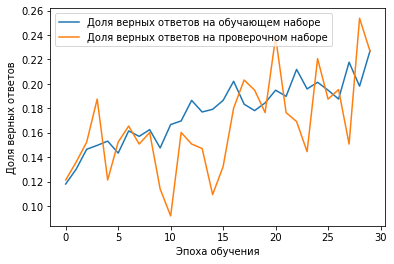

Точность при dense = 32 =  0.2265625
Epoch 1/30
24/30 [=======================>......] - ETA: 5s - loss: 3.1334 - acc: 0.1393

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 33s 1s/step - loss: 3.0437 - acc: 0.1385 - val_loss: 2.1172 - val_acc: 0.1213
Epoch 2/30
30/30 [==============================] - 28s 935ms/step - loss: 2.4577 - acc: 0.1470 - val_loss: 2.0866 - val_acc: 0.1471
Epoch 3/30
30/30 [==============================] - 26s 879ms/step - loss: 2.2578 - acc: 0.1621 - val_loss: 2.1173 - val_acc: 0.1523
Epoch 4/30
30/30 [==============================] - 25s 844ms/step - loss: 2.2022 - acc: 0.1698 - val_loss: 2.1012 - val_acc: 0.2022
Epoch 5/30
30/30 [==============================] - 28s 918ms/step - loss: 2.1704 - acc: 0.1564 - val_loss: 2.1349 - val_acc: 0.1213
Epoch 6/30
30/30 [==============================] - 27s 896ms/step - loss: 2.0972 - acc: 0.1625 - val_loss: 2.1209 - val_acc: 0.1289
Epoch 7/30
30/30 [==============================] - 26s 882ms/step - loss: 2.0624 - acc: 0.2073 - val_loss: 2.1410 - val_acc: 0.1618
Epoch 8/30
30/30 [==============================] - 27s 911ms/step - loss: 2.0950 -

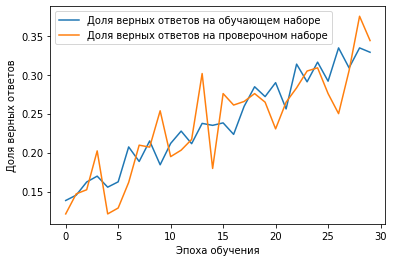

Точность при dense = 64 =  0.34375
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 32s 1s/step - loss: 3.1088 - acc: 0.1423 - val_loss: 2.2351 - val_acc: 0.1654
Epoch 2/30
30/30 [==============================] - 27s 888ms/step - loss: 2.7232 - acc: 0.1677 - val_loss: 2.0519 - val_acc: 0.1949
Epoch 3/30
30/30 [==============================] - 26s 871ms/step - loss: 2.4166 - acc: 0.2038 - val_loss: 2.0537 - val_acc: 0.1992
Epoch 4/30
30/30 [==============================] - 28s 933ms/step - loss: 2.3606 - acc: 0.2135 - val_loss: 2.0880 - val_acc: 0.1728
Epoch 5/30
30/30 [==============================] - 26s 855ms/step - loss: 2.2253 - acc: 0.2142 - val_loss: 2.0419 - val_acc: 0.1728
Epoch 6/30
30/30 [==============================] - 27s 891ms/step - loss: 2.1584 - acc: 0.2434 - val_loss: 2.0317 - val_acc: 0.2422
Epoch 7/30
30/30 [==============================] - 29s 981ms/step - loss: 2.1071 - acc: 0.2521 - val_loss: 2.0135 - val_acc: 0.2574
Epoch 8/30
30/30 [==============================] - 26s 861ms/step - loss: 2.0925 -

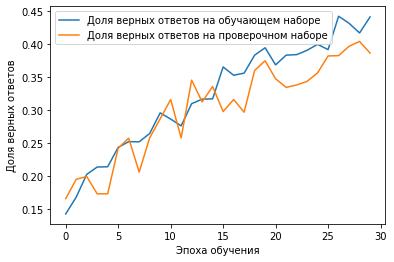

Точность при dense = 128 =  0.38671875


In [0]:
dropout = 0.5
denses = [32, 64, 128]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  '''model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())'''

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Точность при денс 64, 128, 256 на 8 классах без BAtchNormalization
Обучается очень плохо!


Epoch 1/30
 5/30 [====>.........................] - ETA: 31s - loss: 2.5211 - acc: 0.1125

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 32s 1s/step - loss: 2.2365 - acc: 0.1208 - val_loss: 2.0782 - val_acc: 0.2243
Epoch 2/30
30/30 [==============================] - 27s 885ms/step - loss: 2.0760 - acc: 0.1391 - val_loss: 2.0782 - val_acc: 0.1397
Epoch 3/30
30/30 [==============================] - 26s 865ms/step - loss: 2.0769 - acc: 0.1350 - val_loss: 2.0775 - val_acc: 0.1836
Epoch 4/30
30/30 [==============================] - 25s 848ms/step - loss: 2.0822 - acc: 0.1282 - val_loss: 2.0789 - val_acc: 0.0919
Epoch 5/30
30/30 [==============================] - 28s 932ms/step - loss: 2.0776 - acc: 0.1052 - val_loss: 2.0793 - val_acc: 0.1176
Epoch 6/30
30/30 [==============================] - 27s 910ms/step - loss: 2.0756 - acc: 0.1365 - val_loss: 2.0769 - val_acc: 0.1211
Epoch 7/30
30/30 [==============================] - 26s 855ms/step - loss: 2.0798 - acc: 0.1376 - val_loss: 2.0792 - val_acc: 0.1324
Epoch 8/30
30/30 [==============================] - 26s 869ms/step - loss: 2.0746 -

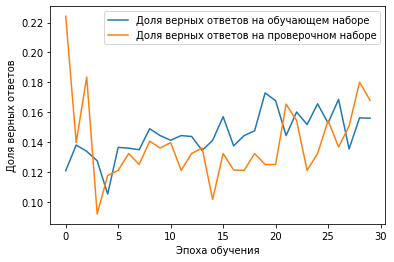

Точность при dense = 128 =  0.16796875
Epoch 1/30
30/30 [==============================] - 32s 1s/step - loss: 2.2430 - acc: 0.1245 - val_loss: 2.0791 - val_acc: 0.1176
Epoch 2/30
 6/30 [=====>........................] - ETA: 5s - loss: 2.0937 - acc: 0.1615

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 26s 875ms/step - loss: 2.0895 - acc: 0.1365 - val_loss: 2.0774 - val_acc: 0.1471
Epoch 3/30
30/30 [==============================] - 27s 895ms/step - loss: 2.0719 - acc: 0.1625 - val_loss: 2.0768 - val_acc: 0.1797
Epoch 4/30
30/30 [==============================] - 26s 875ms/step - loss: 2.0547 - acc: 0.1781 - val_loss: 2.0760 - val_acc: 0.1801
Epoch 5/30
30/30 [==============================] - 27s 892ms/step - loss: 2.0690 - acc: 0.1490 - val_loss: 2.0762 - val_acc: 0.2243
Epoch 6/30
30/30 [==============================] - 26s 877ms/step - loss: 2.0452 - acc: 0.1892 - val_loss: 2.0742 - val_acc: 0.2266
Epoch 7/30
30/30 [==============================] - 27s 891ms/step - loss: 2.0455 - acc: 0.1771 - val_loss: 2.0702 - val_acc: 0.2206
Epoch 8/30
30/30 [==============================] - 27s 909ms/step - loss: 2.0386 - acc: 0.1772 - val_loss: 2.0624 - val_acc: 0.2941
Epoch 9/30
30/30 [==============================] - 28s 918ms/step - loss: 2.034

KeyboardInterrupt: ignored

In [0]:
dropout = 0.5
denses = [128, 256]
for dense in denses:
  model = Sequential()
  #model.add(BatchNormalization(input_shape=(112, 112, 3)))

  '''model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())'''

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(112, 112, 3)))
  model.add(Dropout(dropout))
  #model.add(BatchNormalization())  

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  #model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  #model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Сеть с Денсе 128, 256, 512 на 8 классах

In [0]:
dropout = 0.5
denses = [128, 256, 512]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  '''model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())'''

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-807e02249094>", line 5, in <module>
    model.add(BatchNormalization(input_shape=(112, 112, 3)))
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py", line 166, in add
    layer(x)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/base_layer.py", line 451, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/normalization.py", line 185, in call
    epsilon=self.epsilon)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2065, in normalize_batch_in_training
    if not _has_nchw_support() and list(reduction_axes) == [0, 2, 3]:
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 312, in _has_nchw_support
   

KeyboardInterrupt: ignored

# Более сложная сеть + 64 нейронов Dense 128, 256, 8 классов

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
 8/30 [=======>......................] - ETA: 3:27 - loss: 3.3114 - acc: 0.1174

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 282s 9s/step - loss: 3.1922 - acc: 0.1251 - val_loss: 2.2992 - val_acc: 0.1324
Epoch 2/30
30/30 [==============================] - 192s 6s/step - loss: 2.6919 - acc: 0.1885 - val_loss: 2.1370 - val_acc: 0.1471
Epoch 3/30
30/30 [==============================] - 29s 971ms/step - loss: 2.5282 - acc: 0.1923 - val_loss: 2.1066 - val_acc: 0.1289
Epoch 4/30
30/30 [==============================] - 28s 932ms/step - loss: 2.3404 - acc: 0.2032 - val_loss: 2.0461 - val_acc: 0.1838
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 2.2499 - acc: 0.2083 - val_loss: 2.0522 - val_acc: 0.2096
Epoch 6/30
30/30 [==============================] - 31s 1s/step - loss: 2.2395 - acc: 0.2219 - val_loss: 2.0550 - val_acc: 0.1602
Epoch 7/30
30/30 [==============================] - 28s 945ms/step - loss: 2.1505 - acc: 0.2106 - val_loss: 2.0017 - val_acc: 0.2132
Epoch 8/30
30/30 [==============================] - 31s 1s/step - loss: 2.1777 - acc: 0.21

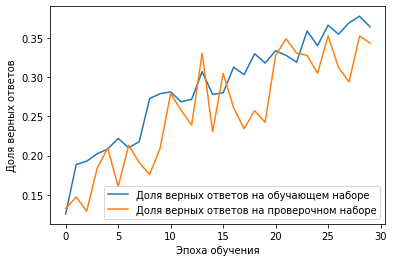

Точность при dense = 128 =  0.34375
Epoch 1/30
 3/30 [==>...........................] - ETA: 38s - loss: 3.3820 - acc: 0.1458

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 34s 1s/step - loss: 3.1273 - acc: 0.1563 - val_loss: 2.5250 - val_acc: 0.1912
Epoch 2/30
30/30 [==============================] - 30s 985ms/step - loss: 2.9053 - acc: 0.1678 - val_loss: 2.1606 - val_acc: 0.1691
Epoch 3/30
30/30 [==============================] - 31s 1s/step - loss: 2.4858 - acc: 0.2094 - val_loss: 2.1745 - val_acc: 0.1719
Epoch 4/30
30/30 [==============================] - 29s 967ms/step - loss: 2.3781 - acc: 0.2152 - val_loss: 2.1100 - val_acc: 0.2243
Epoch 5/30
30/30 [==============================] - 30s 986ms/step - loss: 2.2552 - acc: 0.2386 - val_loss: 2.1021 - val_acc: 0.2390
Epoch 6/30
30/30 [==============================] - 29s 962ms/step - loss: 2.0985 - acc: 0.2583 - val_loss: 2.0495 - val_acc: 0.2422
Epoch 7/30
30/30 [==============================] - 30s 1s/step - loss: 2.1122 - acc: 0.2708 - val_loss: 2.0882 - val_acc: 0.1765
Epoch 8/30
30/30 [==============================] - 30s 990ms/step - loss: 2.0608 - acc: 

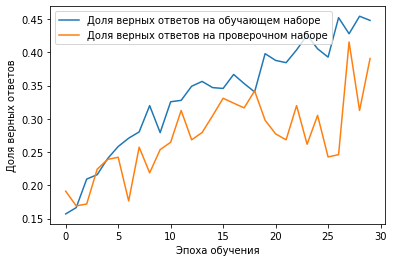

Точность при dense = 256 =  0.390625


In [0]:
dropout = 0.5
denses = [128, 256]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

# Своя сеть + 128 нейронов 128, 256 8 классов

Epoch 1/30
24/30 [=======================>......] - ETA: 6s - loss: 3.3370 - acc: 0.1549

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 36s 1s/step - loss: 3.3027 - acc: 0.1548 - val_loss: 2.5982 - val_acc: 0.1360
Epoch 2/30
30/30 [==============================] - 30s 1s/step - loss: 3.1041 - acc: 0.1250 - val_loss: 2.3315 - val_acc: 0.1250
Epoch 3/30
30/30 [==============================] - 32s 1s/step - loss: 2.8835 - acc: 0.1391 - val_loss: 2.2943 - val_acc: 0.1133
Epoch 4/30
30/30 [==============================] - 29s 959ms/step - loss: 2.7109 - acc: 0.1635 - val_loss: 2.2362 - val_acc: 0.1066
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 2.6141 - acc: 0.1553 - val_loss: 2.1500 - val_acc: 0.1728
Epoch 6/30
30/30 [==============================] - 30s 1s/step - loss: 2.3655 - acc: 0.1641 - val_loss: 2.1695 - val_acc: 0.0938
Epoch 7/30
30/30 [==============================] - 27s 915ms/step - loss: 2.2755 - acc: 0.2104 - val_loss: 2.0854 - val_acc: 0.1507
Epoch 8/30
30/30 [==============================] - 33s 1s/step - loss: 2.2043 - acc: 0.1886 - 

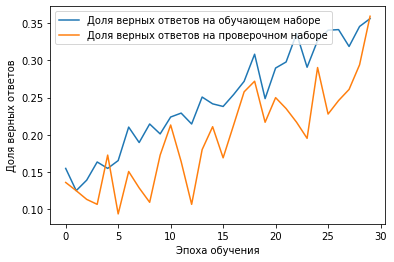

Точность при dense = 128 =  0.359375
Epoch 1/30
11/30 [==========>...................] - ETA: 20s - loss: 3.2536 - acc: 0.1591

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 35s 1s/step - loss: 3.3555 - acc: 0.1323 - val_loss: 2.3148 - val_acc: 0.1250
Epoch 2/30
30/30 [==============================] - 30s 1s/step - loss: 2.9929 - acc: 0.1552 - val_loss: 2.2041 - val_acc: 0.1287
Epoch 3/30
30/30 [==============================] - 31s 1s/step - loss: 2.8707 - acc: 0.1683 - val_loss: 2.0902 - val_acc: 0.1250
Epoch 4/30
30/30 [==============================] - 28s 945ms/step - loss: 2.5571 - acc: 0.2167 - val_loss: 2.0922 - val_acc: 0.1544
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 2.4699 - acc: 0.2105 - val_loss: 2.0329 - val_acc: 0.1544
Epoch 6/30
30/30 [==============================] - 30s 1s/step - loss: 2.3496 - acc: 0.2381 - val_loss: 1.9762 - val_acc: 0.2461
Epoch 7/30
30/30 [==============================] - 29s 963ms/step - loss: 2.2249 - acc: 0.2562 - val_loss: 1.9487 - val_acc: 0.2721
Epoch 8/30
30/30 [==============================] - 29s 976ms/step - loss: 2.1526 - acc: 0.2866

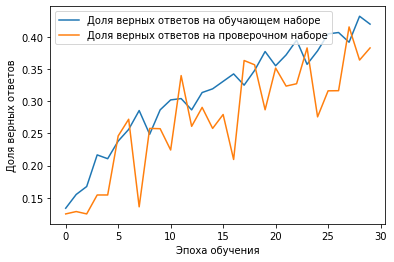

Точность при dense = 256 =  0.3828125


In [0]:
dropout = 0.5
denses = [128, 256]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

#Своя сеть + 128 нейронов , dense = 256, 512 8 классов

Epoch 1/30
 9/30 [========>.....................] - ETA: 27s - loss: 3.5214 - acc: 0.1285

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 37s 1s/step - loss: 3.4107 - acc: 0.1303 - val_loss: 2.3749 - val_acc: 0.0772
Epoch 2/30
30/30 [==============================] - 28s 942ms/step - loss: 3.1352 - acc: 0.1240 - val_loss: 3.3734 - val_acc: 0.1287
Epoch 3/30
30/30 [==============================] - 30s 994ms/step - loss: 2.7917 - acc: 0.1860 - val_loss: 2.8373 - val_acc: 0.1367
Epoch 4/30
30/30 [==============================] - 29s 982ms/step - loss: 2.6541 - acc: 0.1771 - val_loss: 2.5028 - val_acc: 0.0882
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 2.5214 - acc: 0.2131 - val_loss: 2.3831 - val_acc: 0.1213
Epoch 6/30
30/30 [==============================] - 30s 986ms/step - loss: 2.4242 - acc: 0.2021 - val_loss: 2.4353 - val_acc: 0.1211
Epoch 7/30
30/30 [==============================] - 28s 946ms/step - loss: 2.3055 - acc: 0.2220 - val_loss: 2.4258 - val_acc: 0.1397
Epoch 8/30
30/30 [==============================] - 29s 958ms/step - loss: 2.2103 - ac

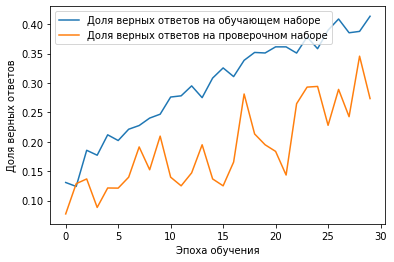

Точность при dense = 256 =  0.2734375
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 37s 1s/step - loss: 3.1772 - acc: 0.1564 - val_loss: 2.5759 - val_acc: 0.1250
Epoch 2/30
30/30 [==============================] - 27s 917ms/step - loss: 2.9971 - acc: 0.1708 - val_loss: 2.4979 - val_acc: 0.1691
Epoch 3/30
30/30 [==============================] - 32s 1s/step - loss: 2.9172 - acc: 0.1621 - val_loss: 2.6769 - val_acc: 0.1602
Epoch 4/30
30/30 [==============================] - 28s 944ms/step - loss: 2.7339 - acc: 0.2152 - val_loss: 2.1226 - val_acc: 0.2500
Epoch 5/30
30/30 [==============================] - 30s 1s/step - loss: 2.5905 - acc: 0.2323 - val_loss: 2.3956 - val_acc: 0.1213
Epoch 6/30
30/30 [==============================] - 28s 946ms/step - loss: 2.4924 - acc: 0.2241 - val_loss: 2.0178 - val_acc: 0.2617
Epoch 7/30
30/30 [==============================] - 30s 988ms/step - loss: 2.3195 - acc: 0.2479 - val_loss: 2.1286 - val_acc: 0.1875
Epoch 8/30
30/30 [==============================] - 31s 1s/step - loss: 2.1480 - acc: 0.2

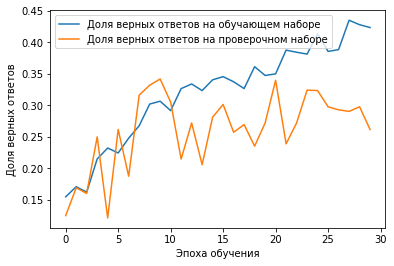

Точность при dense = 512 =  0.26171875


In [0]:
dropout = 0.5
denses = [256, 512]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

#Dense 256, 128 neyronov разные степс пер епох

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


60/60 [==============================] - 64s 1s/step - loss: 3.1227 - acc: 0.1625 - val_loss: 2.9304 - val_acc: 0.1324
Epoch 2/30
60/60 [==============================] - 58s 961ms/step - loss: 2.7804 - acc: 0.2305 - val_loss: 2.2802 - val_acc: 0.1360
Epoch 3/30
60/60 [==============================] - 59s 983ms/step - loss: 2.5916 - acc: 0.2280 - val_loss: 2.4095 - val_acc: 0.1289
Epoch 4/30
60/60 [==============================] - 57s 944ms/step - loss: 2.3187 - acc: 0.2803 - val_loss: 2.2340 - val_acc: 0.1581
Epoch 5/30
60/60 [==============================] - 60s 995ms/step - loss: 2.1249 - acc: 0.2988 - val_loss: 2.0226 - val_acc: 0.2610
Epoch 6/30
60/60 [==============================] - 58s 966ms/step - loss: 2.0522 - acc: 0.3169 - val_loss: 2.1573 - val_acc: 0.1641
Epoch 7/30
60/60 [==============================] - 57s 942ms/step - loss: 2.0139 - acc: 0.3203 - val_loss: 1.9785 - val_acc: 0.2059
Epoch 8/30
60/60 [==============================] - 58s 968ms/step - loss: 1.8905 -

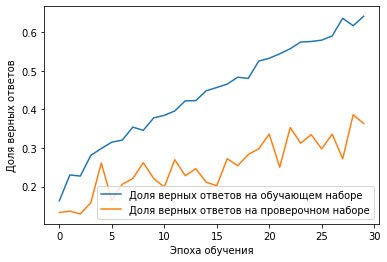

Точность при dense = 512 =  0.36328125
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 99s 994ms/step - loss: 3.1570 - acc: 0.1516 - val_loss: 2.6985 - val_acc: 0.1250
Epoch 2/30
100/100 [==============================] - 92s 920ms/step - loss: 2.5759 - acc: 0.2129 - val_loss: 2.4764 - val_acc: 0.1176
Epoch 3/30
100/100 [==============================] - 92s 925ms/step - loss: 2.1879 - acc: 0.2687 - val_loss: 2.3258 - val_acc: 0.2266
Epoch 4/30
100/100 [==============================] - 92s 921ms/step - loss: 1.9966 - acc: 0.3255 - val_loss: 2.2355 - val_acc: 0.2316
Epoch 5/30
100/100 [==============================] - 94s 936ms/step - loss: 1.8805 - acc: 0.3498 - val_loss: 2.3200 - val_acc: 0.2243
Epoch 6/30
100/100 [==============================] - 92s 921ms/step - loss: 1.7820 - acc: 0.3815 - val_loss: 2.8004 - val_acc: 0.2148
Epoch 7/30
100/100 [==============================] - 91s 914ms/step - loss: 1.7126 - acc: 0.4104 - val_loss: 2.4123 - val_acc: 0.2537
Epoch 8/30
100/100 [==============================] - 90s 903ms/st

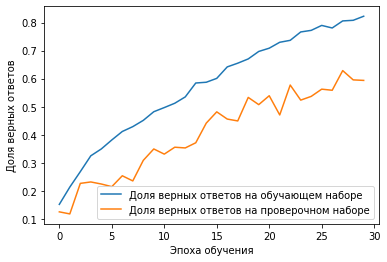

Точность при dense = 512 =  0.59375
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 180s 902ms/step - loss: 2.7995 - acc: 0.2013 - val_loss: 2.7934 - val_acc: 0.1287
Epoch 2/30
200/200 [==============================] - 174s 870ms/step - loss: 2.1250 - acc: 0.2898 - val_loss: 2.8050 - val_acc: 0.2022
Epoch 3/30
200/200 [==============================] - 175s 876ms/step - loss: 1.8293 - acc: 0.3813 - val_loss: 3.8346 - val_acc: 0.1367
Epoch 4/30
200/200 [==============================] - 173s 864ms/step - loss: 1.6308 - acc: 0.4398 - val_loss: 3.2950 - val_acc: 0.2500
Epoch 5/30
200/200 [==============================] - 176s 879ms/step - loss: 1.4882 - acc: 0.4867 - val_loss: 2.9439 - val_acc: 0.2353
Epoch 6/30
200/200 [==============================] - 176s 879ms/step - loss: 1.3541 - acc: 0.5459 - val_loss: 2.7218 - val_acc: 0.3789
Epoch 7/30
200/200 [==============================] - 172s 861ms/step - loss: 1.2489 - acc: 0.5687 - val_loss: 2.7539 - val_acc: 0.3824
Epoch 8/30
200/200 [==============================] - 175s 

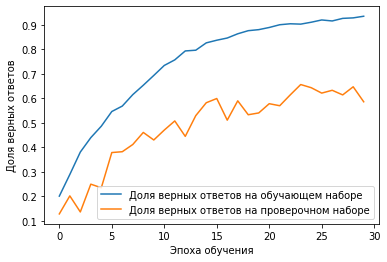

Точность при dense = 512 =  0.5859375


In [0]:
dropout = 0.5
denses = 256
steps = [60, 100, 200]
for step in steps:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          #steps_per_epoch=30,
          steps_per_epoch=step,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

#Точность при Денсе 512 + больше эпох, степ === 200 + maxp

In [0]:
dropout = 0.5
dense = 256
steps = [200]
epochs = 50
for step in steps:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          #steps_per_epoch=30,
          steps_per_epoch=step,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
  8/200 [>.............................] - ETA: 44:34 - loss: 3.0831 - acc: 0.1523

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 738s 4s/step - loss: 2.8398 - acc: 0.1222 - val_loss: 2.1620 - val_acc: 0.1360
Epoch 2/50
200/200 [==============================] - 163s 815ms/step - loss: 2.6603 - acc: 0.1265 - val_loss: 2.1798 - val_acc: 0.1360
Epoch 3/50
200/200 [==============================] - 162s 809ms/step - loss: 2.5468 - acc: 0.1369 - val_loss: 2.2070 - val_acc: 0.1523
Epoch 4/50
200/200 [==============================] - 163s 813ms/step - loss: 2.4665 - acc: 0.1398 - val_loss: 2.2063 - val_acc: 0.1360
Epoch 5/50
200/200 [==============================] - 162s 809ms/step - loss: 2.3588 - acc: 0.1548 - val_loss: 2.1805 - val_acc: 0.1397
Epoch 6/50
200/200 [==============================] - 162s 812ms/step - loss: 2.3178 - acc: 0.1553 - val_loss: 2.1745 - val_acc: 0.1367
Epoch 7/50
200/200 [==============================] - 162s 810ms/step - loss: 2.2764 - acc: 0.1542 - val_loss: 2.1555 - val_acc: 0.1324
Epoch 8/50
200/200 [==============================] - 162s 812